In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

## Import Data

In [3]:
rawData = pd.read_csv("../Data/rssi3.csv")
rawData.drop("name", axis=1, inplace=True)
rawData

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [4]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


## Pivot Table
So that the scanners appear as columns

In [5]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [6]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,2019-12-03 08:43:25.486,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,NaN
24300,2019-12-03 08:43:25.549,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24301,2019-12-03 08:43:25.552,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,NaN,NaN,NaN,NaN
24302,2019-12-03 08:43:25.554,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read Pin (Fingerprints) Location

In [7]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData.head()

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133


In [8]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

## Inspect Data based on Location
1. Mean of the RSSI correlates with the sample rate
2. RSSI received by the closest scanners usually has a middle level of standard deviation

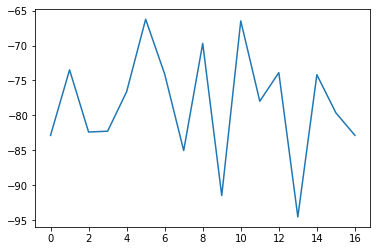

In [9]:
m = B1[B1['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

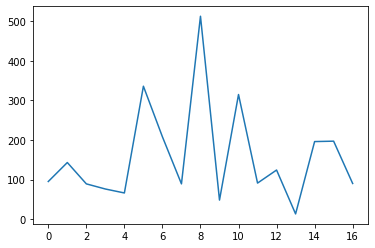

In [10]:
m = B1[B1['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)

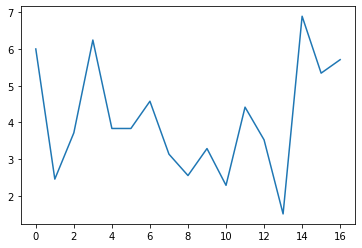

In [11]:
m = B1[B1['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)

In [12]:
B1[B1['location'] == "V1_23"].describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,95.000000,143.000000,89.000000,76.000000,66.000000,336.000000,208.000000,89.000000,513.000000,48.000000,315.000000,91.000000,124.000000,13.000000,196.000000,197.000000,90.000000
mean,-82.863158,-73.475524,-82.382022,-82.263158,-76.606061,-66.229167,-74.081731,-85.033708,-69.684211,-91.479167,-66.466667,-77.967033,-73.870968,-94.538462,-74.178571,-79.629442,-82.855556
std,6.001082,2.454752,3.715770,6.244717,3.834575,3.834390,4.576568,3.135027,2.552129,3.287563,2.285652,4.415756,3.524520,1.506397,6.892861,5.342336,5.709368
min,-92.000000,-80.000000,-92.000000,-97.000000,-96.000000,-82.000000,-94.000000,-94.000000,-81.000000,-98.000000,-73.000000,-94.000000,-82.000000,-98.000000,-92.000000,-91.000000,-96.000000
25%,-89.500000,-75.000000,-84.000000,-89.000000,-79.000000,-67.000000,-77.000000,-87.000000,-71.000000,-94.000000,-69.000000,-78.500000,-75.000000,-95.000000,-77.000000,-81.000000,-89.000000
50%,-82.000000,-73.000000,-84.000000,-81.000000,-77.000000,-64.000000,-73.000000,-84.000000,-69.000000,-91.000000,-66.000000,-77.000000,-74.000000,-94.000000,-72.000000,-78.000000,-80.000000
75%,-77.000000,-72.000000,-79.000000,-77.000000,-73.250000,-64.000000,-70.000000,-82.000000,-68.000000,-89.000000,-65.000000,-75.000000,-71.500000,-93.000000,-69.000000,-75.000000,-78.000000
max,-76.000000,-69.000000,-76.000000,-75.000000,-72.000000,-62.000000,-68.000000,-81.000000,-65.000000,-85.000000,-62.000000,-74.000000,-68.000000,-93.000000,-66.000000,-71.000000,-77.000000


## Inspect Data based on Location and Scanner
1. Scanners further away have a low sample rate

In [13]:
def loc_scanner(loc, scanner):
    V1 = B1[B1['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner])
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

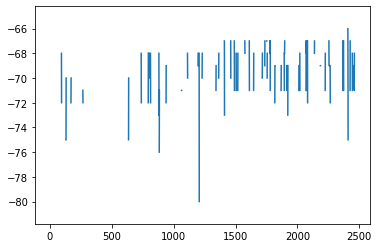

/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mimos/anaconda3/envs/loc/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


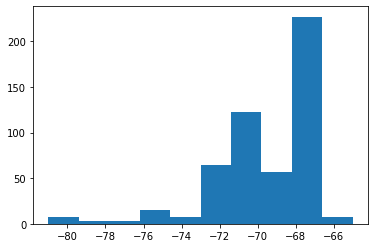

In [14]:
loc_scanner("V1_23", "E6D9D20DD197")

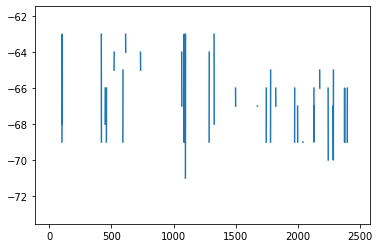

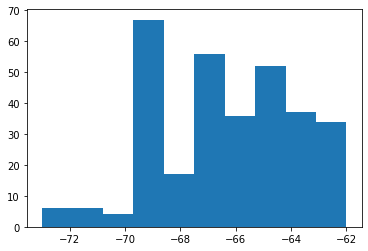

In [15]:
loc_scanner("V1_23", "E96AF2C858BA")

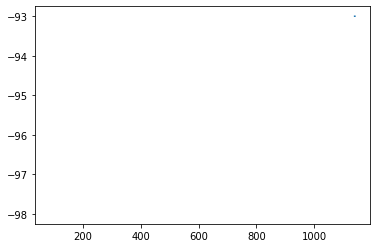

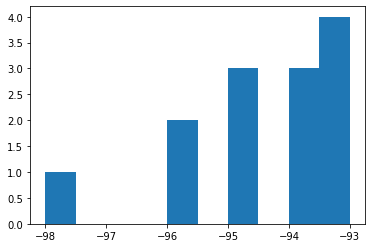

In [16]:
loc_scanner("V1_23", "F1EDAF28E08A")

## Group by Data within a Fixed Interval
1. The mean RSSI is correlated with sample rate
2. Standard deviation of the scanners closed to the beacon is at middle level

In [17]:
B1_mean = B1.groupby(["location", pd.Grouper(key="time", freq="5s")]).mean().reset_index()
B1_mean

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,-79.500000,-66.666667,-75.000000,-72.800000,-70.666667,-76.300000,NaN,-82.333333,-83.166667,-92.333333,-81.000000,-58.181818,-66.750000,-87.166667,-71.500000,-91.000000,-75.750000
1,V1_12,2019-12-02 01:30:05,-76.666667,-66.142857,-72.666667,-74.000000,-73.500000,-74.250000,-84.666667,-83.333333,-83.750000,-89.000000,-84.500000,-58.333333,-69.500000,-89.000000,-73.300000,-94.000000,-75.000000
2,V1_12,2019-12-02 01:30:10,-75.875000,-65.750000,-74.250000,-74.400000,-73.166667,-77.666667,-81.444444,-83.000000,-83.818182,-90.800000,-84.833333,-58.181818,-69.444444,-90.444444,-72.600000,-93.000000,-75.333333
3,V1_12,2019-12-02 01:30:15,-76.800000,-66.500000,-76.166667,-74.666667,-72.333333,-75.400000,-80.250000,-84.600000,-86.666667,-90.000000,-90.000000,-59.071429,-67.444444,-90.333333,-73.500000,-91.666667,-74.875000
4,V1_12,2019-12-02 01:30:20,-80.900000,NaN,-73.500000,-72.800000,-75.909091,-76.333333,-80.000000,-85.000000,-89.000000,-91.666667,-83.333333,-58.285714,-69.600000,-90.142857,-72.071429,-92.666667,-75.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,-89.000000,-83.000000,-84.000000,-90.000000,-89.500000,-70.200000,-77.000000,-92.500000,-68.428571,-93.000000,-55.750000,-83.000000,NaN,NaN,-83.250000,-72.428571,-85.000000
284,V1_32,2019-12-03 08:27:50,-88.666667,-82.600000,-83.000000,-92.500000,-90.500000,-74.142857,-82.000000,-94.000000,-69.750000,NaN,-56.529412,-82.428571,-84.000000,NaN,-83.666667,-71.285714,-84.600000
285,V1_32,2019-12-03 08:27:55,-87.500000,-79.500000,-83.400000,-92.333333,NaN,-75.333333,-78.714286,-94.000000,-69.695652,-94.000000,-58.058824,-79.666667,-84.500000,NaN,NaN,-70.363636,-85.000000
286,V1_32,2019-12-03 08:28:00,-92.000000,-81.428571,-82.000000,-87.000000,-87.000000,-77.000000,-75.222222,NaN,-69.692308,-95.000000,-58.800000,-80.750000,-81.500000,NaN,NaN,-72.700000,-85.250000


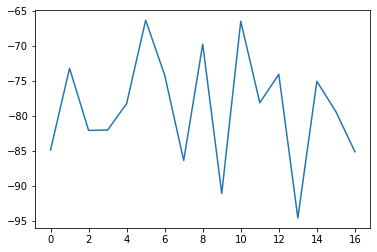

In [18]:
m = B1_mean[B1_mean['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [19]:
B1_median = B1.groupby(["location", pd.Grouper(key="time", freq="5s")]).median().reset_index()
B1_median

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,-79.5,-66.0,-75.0,-71.0,-71.0,-76.0,NaN,-82.0,-82.5,-92.0,-81.0,-58.0,-67.0,-85.0,-71.5,-91.0,-76.0
1,V1_12,2019-12-02 01:30:05,-75.0,-66.0,-72.0,-77.0,-70.5,-73.0,-85.0,-82.5,-83.5,-89.0,-85.0,-58.5,-68.0,-89.0,-73.5,-94.0,-75.0
2,V1_12,2019-12-02 01:30:10,-74.5,-66.0,-74.5,-73.5,-71.0,-80.0,-80.0,-81.0,-84.0,-91.0,-87.0,-59.0,-68.0,-91.0,-72.0,-93.0,-75.0
3,V1_12,2019-12-02 01:30:15,-77.0,-65.0,-74.5,-74.5,-70.5,-75.0,-80.5,-83.0,-86.0,-89.0,-90.0,-59.0,-67.0,-90.0,-74.0,-92.0,-75.0
4,V1_12,2019-12-02 01:30:20,-82.0,NaN,-73.5,-71.0,-71.0,-76.0,-80.0,-85.0,-88.0,-91.0,-83.0,-58.0,-69.0,-89.0,-72.0,-93.0,-74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,-89.0,-84.0,-84.0,-90.0,-89.0,-67.0,-73.0,-92.5,-68.0,-93.0,-58.0,-81.0,NaN,NaN,-83.0,-74.0,-85.0
284,V1_32,2019-12-03 08:27:50,-87.0,-82.0,-83.0,-92.5,-90.5,-76.0,-84.0,-94.0,-69.0,NaN,-58.0,-81.0,-84.0,NaN,-84.0,-70.0,-84.0
285,V1_32,2019-12-03 08:27:55,-87.5,-79.5,-83.0,-91.0,NaN,-76.0,-73.0,-94.0,-69.0,-94.0,-58.0,-80.0,-84.5,NaN,NaN,-69.0,-85.0
286,V1_32,2019-12-03 08:28:00,-92.0,-81.0,-82.0,-87.0,-87.0,-77.0,-73.0,NaN,-69.0,-95.0,-58.0,-80.0,-81.5,NaN,NaN,-75.0,-84.0


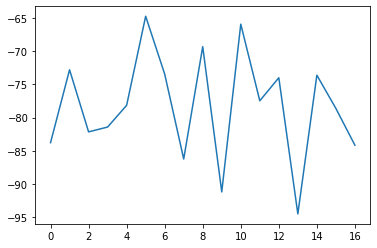

In [20]:
m = B1_median[B1_median['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [21]:
B1_std = B1.groupby(["location", pd.Grouper(key="time", freq="5s")]).std().reset_index()
B1_std

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,4.932883,1.751190,1.000000,5.069517,0.577350,3.888730,NaN,0.577350,2.401388,3.511885,4.242641,1.328020,2.217356,4.665476,1.643168,NaN,2.217356
1,V1_12,2019-12-02 01:30:05,6.121002,1.573592,1.154701,4.873397,5.049752,4.200340,4.509250,3.559026,1.669046,NaN,1.914854,1.366260,3.331666,4.582576,2.869379,2.000000,1.309307
2,V1_12,2019-12-02 01:30:10,4.911721,0.753778,0.957427,5.985167,4.445972,4.932883,3.045944,4.690416,0.603023,2.588436,3.371449,1.401298,3.244654,2.650996,1.173788,0.000000,1.414214
3,V1_12,2019-12-02 01:30:15,4.711688,3.696846,5.913262,6.282250,4.206777,3.577709,0.957427,5.412947,3.881580,3.464102,8.485281,2.464027,1.740051,3.427827,4.603510,0.577350,1.552648
4,V1_12,2019-12-02 01:30:20,5.237684,NaN,1.290994,3.271085,6.187965,4.082483,0.707107,2.828427,2.598076,1.322876,2.065591,0.913874,3.911521,2.544836,1.774360,0.577350,1.595131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,NaN,2.000000,0.000000,NaN,1.732051,5.357238,8.000000,2.121320,2.820841,NaN,3.623994,4.183300,NaN,NaN,1.500000,2.992053,1.414214
284,V1_32,2019-12-03 08:27:50,3.785939,0.894427,1.000000,3.535534,0.707107,5.756983,9.823441,NaN,2.989178,NaN,3.793377,4.685337,NaN,NaN,0.577350,3.545621,0.894427
285,V1_32,2019-12-03 08:27:55,0.707107,3.535534,2.302173,3.214550,NaN,8.687155,8.731443,NaN,2.687256,NaN,4.464731,0.577350,0.707107,NaN,NaN,3.443043,NaN
286,V1_32,2019-12-03 08:28:00,NaN,2.636737,NaN,NaN,NaN,4.869732,5.517648,NaN,3.133933,NaN,4.549725,2.217356,0.707107,NaN,NaN,3.653005,2.500000


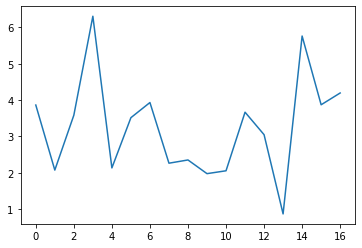

In [22]:
m = B1_std[B1_std['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

In [23]:
B1_count = B1.groupby(["location", pd.Grouper(key="time", freq="5s")]).count().reset_index()
B1_count

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:00,4,6,3,5,3,10,0,3,6,3,2,11,4,6,6,1,4
1,V1_12,2019-12-02 01:30:05,6,7,3,9,6,8,3,6,8,1,4,6,6,5,10,3,8
2,V1_12,2019-12-02 01:30:10,8,12,4,10,6,3,9,5,11,5,6,11,9,9,10,2,9
3,V1_12,2019-12-02 01:30:15,5,4,6,6,12,5,4,5,6,4,2,14,9,9,14,3,8
4,V1_12,2019-12-02 01:30:20,10,0,4,5,11,6,5,2,9,9,6,14,5,7,14,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,V1_32,2019-12-03 08:27:45,1,4,3,1,4,5,4,2,21,1,16,5,0,0,4,7,2
284,V1_32,2019-12-03 08:27:50,3,5,5,2,2,7,5,1,28,0,17,7,1,0,3,7,5
285,V1_32,2019-12-03 08:27:55,2,2,5,3,0,6,7,1,23,1,17,3,2,0,0,11,1
286,V1_32,2019-12-03 08:28:00,1,7,1,1,1,8,9,0,26,1,5,4,2,0,0,10,4


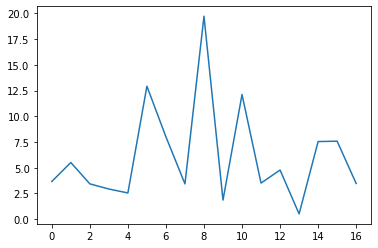

In [24]:
m = B1_count[B1_count['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

## Rolling Data

In [25]:
B1.set_index("time", inplace=True)

In [26]:
B1_rolled = B1.groupby("location").rolling(50, min_periods=1).mean().reset_index()
B1_rolled

,location,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,V1_12,2019-12-02 01:30:01.374,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN
1,V1_12,2019-12-02 01:30:01.435,NaN,-66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.000000,NaN,-84.0,NaN,NaN,NaN
2,V1_12,2019-12-02 01:30:01.538,NaN,-66.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.000000,NaN,-84.0,NaN,NaN,NaN
3,V1_12,2019-12-02 01:30:01.674,NaN,-66.5,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,-58.000000,NaN,-84.0,NaN,NaN,NaN
4,V1_12,2019-12-02 01:30:01.696,NaN,-66.0,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,-58.000000,NaN,-84.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,V1_32,2019-12-03 08:28:09.176,-91.5,-84.0,-80.333333,NaN,-86.0,-73.5,-74.0,NaN,-68.285714,NaN,-57.142857,-82.000000,-84.5,NaN,-84.60,-69.666667,-85.5
24300,V1_32,2019-12-03 08:28:09.213,-91.5,-84.0,-80.333333,NaN,-86.0,-73.5,-74.0,NaN,-68.375000,NaN,-57.142857,-82.000000,-84.5,NaN,-84.60,-69.666667,-86.0
24301,V1_32,2019-12-03 08:28:09.250,-91.5,-84.0,-80.333333,NaN,-86.0,-73.5,-74.0,NaN,-68.375000,NaN,-57.875000,-82.000000,-84.5,NaN,-84.75,-69.666667,-86.0
24302,V1_32,2019-12-03 08:28:09.285,-91.5,-84.0,-80.333333,NaN,-86.0,-73.5,-74.0,NaN,-68.375000,NaN,-57.857143,-82.666667,-84.5,NaN,-84.75,-69.666667,-86.0


In [27]:
B1_rolled.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
count,18727.000000,23193.000000,21778.000000,21609.000000,21126.000000,23646.000000,23573.000000,19099.000000,24172.000000,12202.000000,23303.000000,22030.000000,22226.000000,14399.000000,23192.000000,22026.000000,20986.000000
mean,-84.892110,-73.880183,-79.437803,-81.638802,-77.175738,-71.685493,-72.762564,-86.247682,-75.022854,-91.518398,-74.710730,-75.392607,-73.766343,-90.278692,-73.816446,-82.007232,-84.614407
std,5.239796,6.433541,5.845476,5.727323,5.663160,5.389273,6.896744,4.927859,8.967394,3.605575,8.244920,7.100651,5.597414,4.443147,8.073604,6.857959,4.849074
min,-97.000000,-96.000000,-96.000000,-98.000000,-96.000000,-87.000000,-94.000000,-97.000000,-91.000000,-98.000000,-98.000000,-96.000000,-94.000000,-98.000000,-94.000000,-97.000000,-98.000000
25%,-89.000000,-79.000000,-83.000000,-86.000000,-81.000000,-75.750000,-77.000000,-90.000000,-81.750000,-94.500000,-81.200000,-80.750000,-77.500000,-94.000000,-80.000000,-87.000000,-88.000000
50%,-84.500000,-73.500000,-80.000000,-82.000000,-76.500000,-72.500000,-73.400000,-86.500000,-76.533333,-91.500000,-75.666667,-76.000000,-73.333333,-91.000000,-73.666667,-83.142857,-84.800000
75%,-81.000000,-68.000000,-75.000000,-77.285714,-73.333333,-67.250000,-67.571429,-83.000000,-70.750000,-89.000000,-67.250000,-71.500000,-70.000000,-88.000000,-69.000000,-76.000000,-81.666667
max,-72.000000,-63.750000,-67.750000,-67.000000,-66.000000,-58.166667,-54.875000,-74.000000,-49.526316,-82.000000,-54.250000,-56.500000,-61.750000,-78.000000,-56.500000,-67.000000,-73.000000


In [28]:
B1_rolled.isna().sum()

location            0
time                0
C400A2E19293     5577
CD4533FFC0E1     1111
D2B6503554D7     2526
DB8B36A69C56     2695
DD697EA75B68     3178
DF231643E227      658
E13B805C6CB0      731
E43355CA8B96     5205
E6D9D20DD197      132
E8FD0B453DC4    12102
E96AF2C858BA     1001
EC72840D9AD3     2274
F1307ECB3B90     2078
F1EDAF28E08A     9905
F69A86823B96     1112
FB2EE01C18CE     2278
FDAE5980F28C     3318
dtype: int64

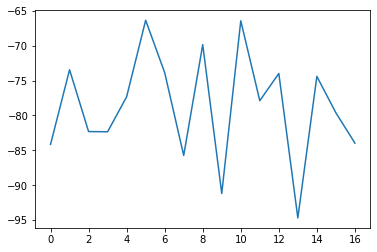

In [29]:
m = B1_rolled[B1_rolled['location'] == "V1_23"].describe().loc["mean", :]
plt.plot(np.arange(17), m)

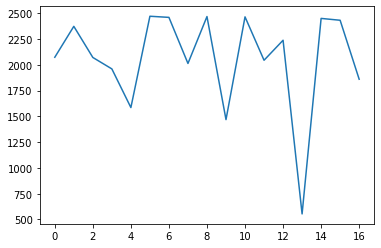

In [30]:
m = B1_rolled[B1_rolled['location'] == "V1_23"].describe().loc["count", :]
plt.plot(np.arange(17), m)

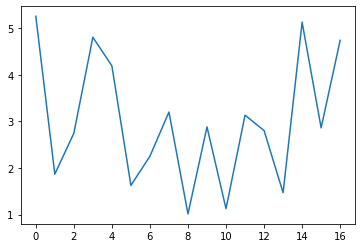

In [31]:
m = B1_rolled[B1_rolled['location'] == "V1_23"].describe().loc["std", :]
plt.plot(np.arange(17), m)

In [32]:
def loc_scanner(loc, scanner):
    V1 = B1_rolled[B1_rolled['location'] == loc]
    plt.figure()
    plt.plot(np.arange(V1.shape[0]), V1[scanner])
    plt.show()
    
    plt.figure()
    plt.hist(V1[scanner])
    plt.show()

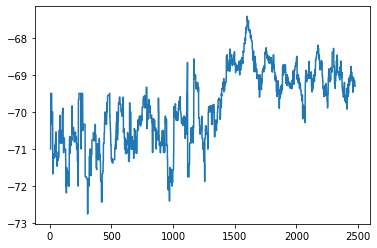

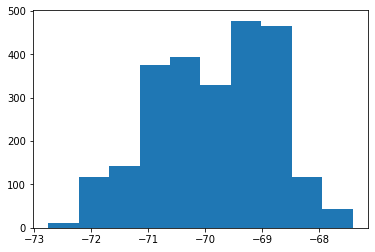

In [33]:
loc_scanner("V1_23", "E6D9D20DD197")

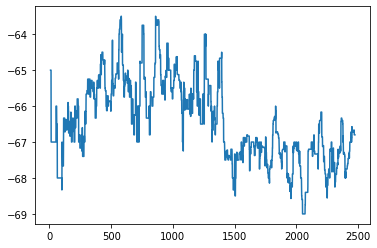

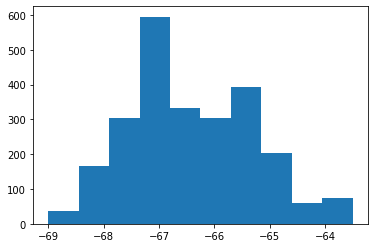

In [34]:
loc_scanner("V1_23", "E96AF2C858BA")

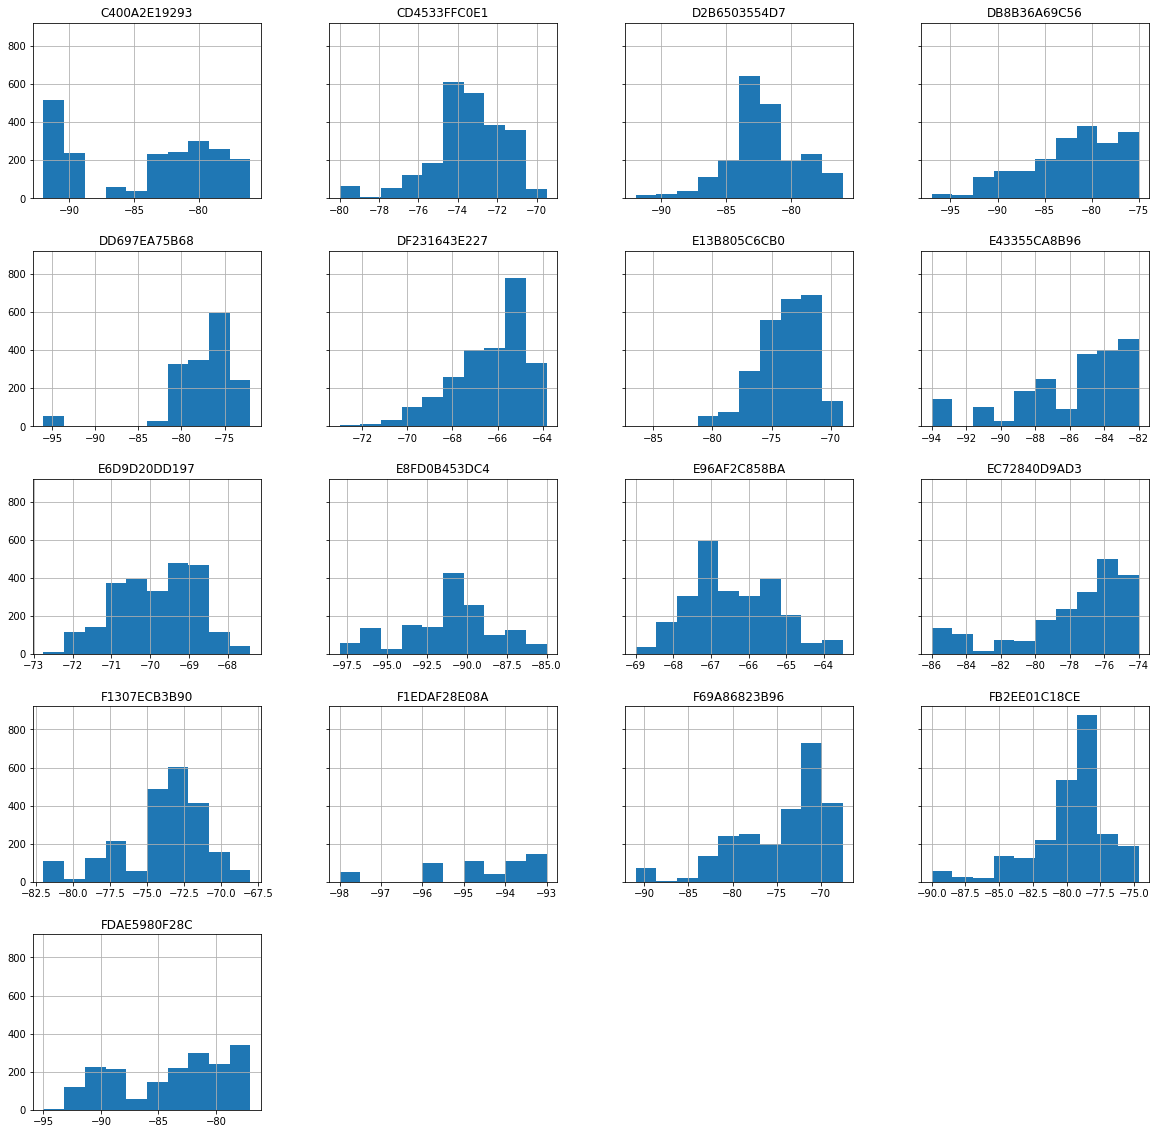

In [35]:
B1_rolled[B1_rolled['location'] == "V1_23"].hist(figsize=(20,20), sharey=True)
plt.show()